<a href="https://colab.research.google.com/github/opinner/Articles/blob/main/Articles/CartopyRegionalMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginning Remarks
Although *Introduction to Cartopy* contains many examples of regional maps, we polar oceanographers are usually interested in the high latitudes, which makes the correct choice of map projection and map extent much more important.

This is aimed to be a example gallery of (hopefully ready to be used) maps of regions, that are most often needed in our section. 

---

### <font color='red'> Only run the following cell if you are on Google Colab</font>
### Install necessary packages

In [3]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 0s (371 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 122545 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Building

## Starting from here this notebook is (mostly) independent of its enviroment. Exceptions are marked in red

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [5]:
print(cartopy.__version__)

0.21.1


# Circumpolar Map

This example is built upon [this example from the Cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/always_circular_stereo.html#custom-boundary-shape).  

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


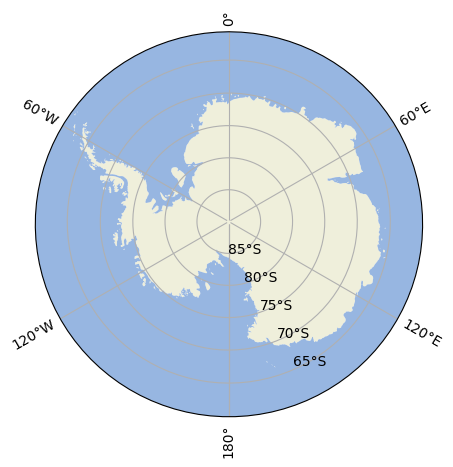

In [6]:
# Import the necessary libraries
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

# Add land and ocean features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Draw gridlines on the map
# If labels are drawn, can be chosen here
ax.gridlines(draw_labels=True)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Set the circular boundary for the map using the transformed circle path
ax.set_boundary(circle, transform=ax.transAxes)



# Weddell Sea

In [7]:
def axis_to_data_coordinates(point,ax, proj):
    import cartopy.crs as ccrs
    """    
    from:
    https://stackoverflow.com/questions/56662941/
    cartopy-convert-point-from-axes-coordinates-to-lat-lon-coordinates
    """
    
    proj_cart = ccrs.PlateCarree() 

    p_a = (point[1],point[0]) #change from lat,lon to lon, lat
    
    # convert from Axes coordinates to display coordinates
    p_a_disp = ax.transAxes.transform(p_a)

    # convert from display coordinates to data coordinates
    p_a_data = ax.transData.inverted().transform(p_a_disp)


    # convert from data to cartesian coordinates
    p_a_cart = proj_cart.transform_point(*p_a_data, src_crs=proj)   
    
    return p_a_cart
    
    
def data_to_axis_coordinates(point, ax, proj):
    """
    Converts a lat,lon coordinate to an axis coordinates between 0 and 1
    adapted from:
    https://stackoverflow.com/questions/56662941/
    cartopy-convert-point-from-axes-coordinates-to-lat-lon-coordinates
    """
    import cartopy.crs as ccrs
        
    proj_cart = ccrs.PlateCarree() 
    p_a_cart = (point[1],point[0]) #change from lat,lon to lon = x, lat = y

    # convert from cartesian coordinates to data
    p_a_data = proj.transform_point(*p_a_cart, src_crs=proj_cart)   

    # convert from data coordinates to display coordinates to 
    p_a_disp = ax.transData.transform(p_a_data)

    # convert from display coordinates to Axes coordinates
    p_a = ax.transAxes.inverted().transform(p_a_disp)

    return p_a

[0.5 0. ]
(-139.99999999999946, -89.99999999999956)
[-75 -70 -65] 3


"\n# sample the colormaps that you want to use. Use 128 from each so we get 256\n# colors in total\ncolors1 = plt.cm.binary(np.linspace(0., 1, 128))\ncolors2 = plt.cm.gist_heat_r(np.linspace(0, 1, 128))\n\n# combine them and build a new colormap\ncolors = np.vstack((colors1, colors2))\nmymap = mcolors.LinearSegmentedColormap.from_list('ice_and_depth', colors)\n"

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


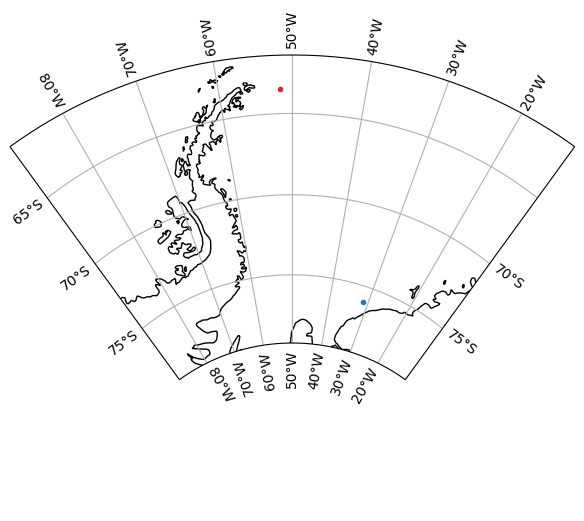

In [8]:
import matplotlib.ticker as mticker

#projection = ccrs.Orthographic(central_longitude=-50, central_latitude=-80)
projection = ccrs.SouthPolarStereo(central_longitude=-50)
# Limit the map to -60 degrees latitude and below.


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection= projection)
ax.coastlines()#resolution='50m')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
lathelp = np.arange(-75,-60,5)
gl.ylocator = mticker.FixedLocator(lathelp)
lonhelp = np.arange(-80,-10,10)
gl.xlocator = mticker.FixedLocator(lonhelp)

gl.bottom_labels = False
gl.right_labels = False

#ax.set_extent([-140, 40, -60, -80], ccrs.PlateCarree())
ax.set_extent([-80, -20, -60, -90], ccrs.PlateCarree())

origin = data_to_axis_coordinates((-90,-50), ax = ax, proj = projection)
print(origin)
print(axis_to_data_coordinates((0,0.5),ax = ax, proj = projection))


#Define the outside shape of the map 
rot = 0 #np.pi/2
theta = np.linspace(-np.pi/5, np.pi/5, 100)
center, radius = [0.5, -0.05], 1
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
outerring = verts * radius + center

theta = np.linspace(-np.pi/5, np.pi/5, 100)
#center, radius = [-50, -90], 30
center, radius = [0.5, -0.05], 0.4
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
innerring = verts * radius + center

annulus = mpath.Path(np.concatenate((outerring,innerring[::-1],[outerring[0,:]])))

# Use the wedge (or annulus) as the boundary.
ax.set_boundary(annulus, transform=ax.transAxes)
#ax.set_boundary(annulus,transform=ccrs.PlateCarree())






#ax.plot(lonhelp,lathelp,"gs", transform = ccrs.PlateCarree())   
#print(lonhelp,lonhelp.size)


#ax.plot(lonhelp,lathelp,"r.", transform = ccrs.PlateCarree())    
print(lathelp,lathelp.size)



#file_path = "/media/sf_VM_Folder/data/moorings/supermooring.mat"
#struct = sio.loadmat(file_path)
#data = struct["mooring"]

#load necessary data into usable variables
#lat_list = np.squeeze(data["LAT"])
#lon_list = np.squeeze(data["LON"])


# Load Bathymetry
#bat_data = sio.loadmat("/media/sf_VM_Folder/data/out.mat") 
#bat_data = sio.loadmat("/media/sf_VM_Folder/data/WeddellSea_Bat.mat") 
#bat_lat = bat_data["lat"]
#bat_lon = bat_data["lon"]
#bat_z = bat_data["z"]


#plot northern moorings
#for i in range(lat_list.size):
#print(np.squeeze(lon_list[i]),np.squeeze(lat_list[i]))
#ax.plot(np.squeeze(lon_list[i]),np.squeeze(lat_list[i]), "r.", transform = ccrs.PlateCarree())



nlat, nlon = -63.5145, -51.6357
slat, slon = -75.9618, -31.482

ax.plot(nlon,nlat, ".", color = "tab:red", transform = ccrs.PlateCarree())
ax.plot(slon,slat, ".", color = "tab:blue", transform = ccrs.PlateCarree())  

#ax.plot(np.arange(0,-180,-1), np.ones(180)*-74.5, "k", transform = ccrs.PlateCarree(), lw = 2, ls = "--", alpha = 1)
#ax.annotate("test",(-50,-63), transform = ccrs.PlateCarree())
#ax.text(-50,-75.4, r"$\phi_c$", weight='bold', transform = ccrs.PlateCarree())

"""
# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = plt.cm.binary(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_heat_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('ice_and_depth', colors)
"""

#ax.set_title("Mooring Locations in the Weddell Sea, Antarctica")
#divnorm = mcolors.TwoSlopeNorm(vcenter=0)
#image = plt.contourf(bat_lon, bat_lat, bat_z, 60,transform=ccrs.PlateCarree(), cmap = cm.cm.topo, norm=divnorm)#, vmax = 300, vmin = -3500)
#image = plt.contourf(bat_lon, bat_lat, bat_z, 60,transform=ccrs.PlateCarree(), cmap = cm.cm.topo, norm=divnorm)#, vmax = 300, vmin = -3500)
#image = plt.contour(bat_lon, bat_lat, bat_z,transform=ccrs.PlateCarree(), colors = "k", levels = [-4000,-3000,-2000,-1000], linestyles = "solid")




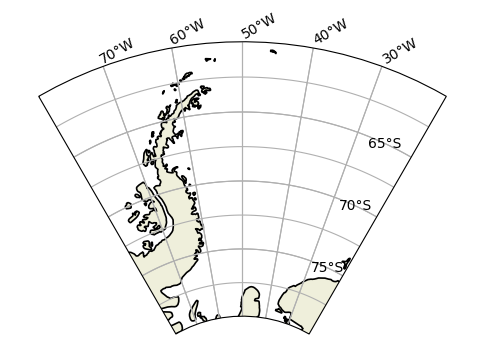

In [9]:
#https://github.com/SciTools/cartopy/issues/697#issuecomment-881873513

import cartopy.crs as ccrs
import cartopy.feature as feat
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import shapely.geometry as sgeom
import cartopy.mpl.patch as cpatch
import matplotlib.patches as patches

high_res_proj = ccrs.SouthPolarStereo(central_longitude=-50)
high_res_proj.threshold = 1e3

xlim = [-80, -20]
ylim = [-60, -80]

# with smaller threshold, it is no need to interpolate
rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ])#.interpolated(20)

plt.figure(figsize=(6,6))                                    
ax = plt.subplot(111, projection=high_res_proj)

gl = ax.gridlines(
    draw_labels= ["top","right","x","y"],
    rotate_labels = True,
    x_inline=False)

ax.gridlines( )

lathelp = np.arange(-75,-60,5)
gl.ylocator = mticker.FixedLocator(lathelp)
lonhelp = np.arange(-80,-10,10)
gl.xlocator = mticker.FixedLocator(lonhelp)
gl.bottom_labels = False
gl.left_labels = True
gl.xlabel_style = {'rotation': 30}


    
ax.add_feature(feat.NaturalEarthFeature('physical', 'land', '50m',
    facecolor=feat.COLORS['land'],
    edgecolor='black',
    linewidth=1.2))

proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
#ax.add_patch(patches.PathPatch(rect_in_target, edgecolor='r', 
#    facecolor='none', lw=4, zorder=2))

ax.set_boundary(rect_in_target)

# To stop any further clipping - this hack is needed
# so that the full extent of the extent is visible
ax.set_extent([xlim[0], xlim[1], ylim[0] + 4, ylim[1]])


In [18]:
def draw_inset_map(boundary, ax, inset_position):
    """
    Draws an inset map within the given axes.

    Parameters:
    boundary (matplotlib.path.Path):  The boundary path of the inset map.
    ax (matplotlib.axes.Axes):        The main axes object where the inset map will be drawn.
    inset_position (tuple):           A 4-tuple (x0, y0, width, height) representing the lower left corner coordinates
                                      of the bounding box used as parameters to bbox_to_anchor.
                                      see: https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib

    Returns:
    None
    """
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    import cartopy.mpl.geoaxes

    # Define the projection for the inset map
    in_projection = ccrs.Orthographic(central_longitude=-50.0, central_latitude=-60.0, globe=None)
    in_projection.threshold = 1e3

    # Create an inset axes for the inset map within the main axes
    ax_ins = inset_axes(ax, width="45%", height="45%", loc="lower left", bbox_to_anchor=inset_position,
                        bbox_transform=ax.transAxes, borderpad=0, axes_class=cartopy.mpl.geoaxes.GeoAxes,
                        axes_kwargs=dict(projection=in_projection))

    # Transform the rectangular path to the data coordinate system of the inset map
    proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax_ins) - ax_ins.transData
    boundary_in_target = proj_to_data.transform_path(boundary)

    # Transform the boundary path to a patch object with a width and color
    # The zorder is set high to ensure the patch is plotted above the gridlines
    boundary_patch = patches.PathPatch(boundary_in_target, edgecolor='r', facecolor='none', lw=4, zorder=50)

    # Turn off axis ticks for the inset map
    ax_ins.tick_params(axis='both', which='both', left=False, right=False, bottom=False, top=False,
                       labelbottom=False)

    # Add the boundary patch to the inset map
    ax_ins.add_patch(boundary_patch)

    # Set the extent of the inset map to global
    ax_ins.set_global()

    # Add gridlines, stock image, and coastlines to the inset map
    ax_ins.gridlines()
    ax_ins.stock_img()
    ax_ins.coastlines()

In [1]:
# https://github.com/SciTools/cartopy/issues/697#issuecomment-881873513

# Import the necessary libraries
import cartopy.crs as ccrs
import cartopy.feature as feat
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import shapely.geometry as sgeom
import cartopy.mpl.patch as cpatch
import matplotlib.patches as patches

# Define the projection for a high-resolution South Polar Stereographic map
high_res_proj = ccrs.SouthPolarStereo(central_longitude=-50)
high_res_proj.threshold = 1e3

# Create a new figure and subplot with the specified projection
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=high_res_proj)

# Configure gridlines for the map
# It was not possible for me 
gl = ax.gridlines(
    draw_labels=["top", "right", "x", "y"], 
    rotate_labels=True, x_inline=False)

# Define the limits for the x-axis and y-axis of the map
xlim = [-80, -20] # longitude
ylim = [-60, -80] # latitude

# Draw latitude and longitude gridlines (and their labels)
# only at the specified values
lathelp = np.arange(-75, -60, 5)
gl.ylocator = mticker.FixedLocator(lathelp)
lonhelp = np.arange(-80, -10, 10)
gl.xlocator = mticker.FixedLocator(lonhelp)

# Rotate the longitude labels to be more readable
gl.xlabel_style = {'rotation': 30}

# Add the land feature to the map with specified appearance
ax.add_feature(feat.NaturalEarthFeature('physical', 'land', '50m',
                                        facecolor=feat.COLORS['land'],
                                        edgecolor='black',
                                        linewidth=1.2))



# Define a rectangular path for the map extent using matplotlib's Path object
rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ])


# Transform the rectangular path to the data coordinate system
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)

# Set the boundary of the map using the transformed rectangular path
ax.set_boundary(rect_in_target)

# To make sure that all of the wanted map extent is visible in the figure,
# (especially because the chosen map projections differs strongly 
# at the poles from the PlateCarree Projection) 
# this hack is needed and may be adjusted, 
# dependent on your map extent and figure size
ax.set_extent([xlim[0], xlim[1], ylim[0] + 4, ylim[1]])


# Transform the boundary path to a patch object with a width and color
#boundary_patch = patches.PathPatch(rect_in_target, edgecolor='r', facecolor='none', lw=1, zorder=2)

draw_inset_map(rect, ax, inset_position = (0, -0.1, 1, 1))

# draw in the boundary also in the main map
# comment in for sanity checking
#ax.add_patch(boundary_patch)

ModuleNotFoundError: ignored